In [102]:
# Install required packages
import subprocess
import sys

packages_to_install = ['xgboost', 'lightgbm', 'catboost', 'scikit-learn']

for package in packages_to_install:
    try:
        __import__(package)
        print(f"{package} is already available")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"{package} installed successfully")

print("All packages are ready!")

xgboost is already available
lightgbm is already available
catboost is already available
Installing scikit-learn...
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


scikit-learn installed successfully
All packages are ready!


# Import Basic Library


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
import xgboost as xgb
import lightgbm as lgb
try:
    from catboost import CatBoostRegressor
    print("CatBoost available")
except ImportError:
    print("CatBoost not available - install with: pip install catboost")
import warnings
import gc
from datetime import datetime
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import pearsonr, spearmanr
plt.style.use('default')
sns.set_palette("husl")

CatBoost available


# Import Necessary Libraries for Preprocessing, Modeling & Evaluation

In [104]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
import xgboost as xgb
import lightgbm as lgb
import warnings
import gc
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import pearsonr, spearmanr
plt.style.use('default')
sns.set_palette("husl")

# Data loading

In [105]:
# Data loading with explicit local paths
import os

# Ensure we're using local files, not Kaggle paths
train_path = "train_data.csv"  # Local file
test_path = "test_data.csv"    # Local file

# Verify files exist before loading
if not os.path.exists(train_path):
    raise FileNotFoundError(f"Train file not found: {train_path}")
if not os.path.exists(test_path):
    raise FileNotFoundError(f"Test file not found: {test_path}")

print("Loading data from local files...")
print(f"Train path: {train_path}")
print(f"Test path: {test_path}")

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(f"Target column info: {train_df['purchaseValue'].describe()}")
print(f"Missing values in train: {train_df.isnull().sum().sum()}")
print(f"Missing values in test: {test_df.isnull().sum().sum()}")
print("✅ Local data loading successful!")

Loading data from local files...
Train path: train_data.csv
Test path: test_data.csv


Train shape: (116023, 52)
Test shape: (29006, 51)
Target column info: count    1.160230e+05
mean     2.656393e+07
std      2.051825e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.312950e+10
Name: purchaseValue, dtype: float64
Missing values in train: 882719
Missing values in test: 220634
✅ Local data loading successful!


In [106]:
# Verify file paths and current directory
import os
print(f"Current working directory: {os.getcwd()}")
print(f"Files in current directory: {os.listdir('.')}")
print(f"Train file exists: {os.path.exists('train_data.csv')}")
print(f"Test file exists: {os.path.exists('test_data.csv')}")

# Double check the paths
train_path = "train_data.csv"
test_path = "test_data.csv"
print(f"Using train path: {train_path}")
print(f"Using test path: {test_path}")

Current working directory: /home/deepeshkumar/Desktop/mlp project 
Files in current directory: ['catboost_info', '22f2001290-notebook-t22025 (4).ipynb', 'test_data.csv', '.venv', 'sample_submission.csv', 'submission.csv', 'train_data.csv']
Train file exists: True
Test file exists: True
Using train path: train_data.csv
Using test path: test_data.csv


In [107]:
# Robust data loading with error handling
import pandas as pd
import os

def safe_load_data():
    """Safely load train and test data with proper error handling"""
    
    # Define possible file paths
    possible_train_paths = [
        "train_data.csv",
        "./train_data.csv",
        os.path.join(os.getcwd(), "train_data.csv")
    ]
    
    possible_test_paths = [
        "test_data.csv", 
        "./test_data.csv",
        os.path.join(os.getcwd(), "test_data.csv")
    ]
    
    # Try loading train data
    train_df = None
    for path in possible_train_paths:
        try:
            if os.path.exists(path):
                print(f"Loading train data from: {path}")
                train_df = pd.read_csv(path)
                print(f"✓ Train data loaded successfully: {train_df.shape}")
                break
        except Exception as e:
            print(f"Failed to load from {path}: {e}")
    
    if train_df is None:
        raise FileNotFoundError("Could not load train_data.csv from any path")
    
    # Try loading test data
    test_df = None
    for path in possible_test_paths:
        try:
            if os.path.exists(path):
                print(f"Loading test data from: {path}")
                test_df = pd.read_csv(path)
                print(f"✓ Test data loaded successfully: {test_df.shape}")
                break
        except Exception as e:
            print(f"Failed to load from {path}: {e}")
    
    if test_df is None:
        raise FileNotFoundError("Could not load test_data.csv from any path")
    
    return train_df, test_df

# Load the data
print("Starting robust data loading...")
train_df, test_df = safe_load_data()

print(f"\n📊 Data Summary:")
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(f"Target column info: {train_df['purchaseValue'].describe()}")
print(f"Missing values in train: {train_df.isnull().sum().sum()}")
print(f"Missing values in test: {test_df.isnull().sum().sum()}")
print("✅ Data loading completed successfully!")

Starting robust data loading...
Loading train data from: train_data.csv
✓ Train data loaded successfully: (116023, 52)
Loading test data from: test_data.csv
✓ Train data loaded successfully: (116023, 52)
Loading test data from: test_data.csv
✓ Test data loaded successfully: (29006, 51)

📊 Data Summary:
Train shape: (116023, 52)
Test shape: (29006, 51)
Target column info: count    1.160230e+05
mean     2.656393e+07
std      2.051825e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.312950e+10
Name: purchaseValue, dtype: float64
Missing values in train: 882719
Missing values in test: 220634
✅ Data loading completed successfully!
✓ Test data loaded successfully: (29006, 51)

📊 Data Summary:
Train shape: (116023, 52)
Test shape: (29006, 51)
Target column info: count    1.160230e+05
mean     2.656393e+07
std      2.051825e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.312950e+10
Name

# COMPREHENSIVE EXPLORATORY DATA ANALYSIS

# MISSING VALUES ANALYSIS

In [108]:
print("\n" + "="*25 + " MISSING VALUES ANALYSIS " + "="*25)

# Check for missing values
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

print("Missing values in training data:")
missing_cols_train = missing_train[missing_train > 0]
if len(missing_cols_train) > 0:
    for col, count in missing_cols_train.items():
        percentage = (count / len(train_df)) * 100
        print(f"  {col}: {count} ({percentage:.2f}%)")
else:
    print("  No missing values in training data!")

print("\nMissing values in test data:")
missing_cols_test = missing_test[missing_test > 0]
if len(missing_cols_test) > 0:
    for col, count in missing_cols_test.items():
        percentage = (count / len(test_df)) * 100
        print(f"  {col}: {count} ({percentage:.2f}%)")
else:
    print("  No missing values in test data!")

# Identify column types for preprocessing
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove target and id columns from features list
if 'purchaseValue' in numeric_cols:
    numeric_cols.remove('purchaseValue')
if 'id' in numeric_cols:
    numeric_cols.remove('id')
if 'id' in categorical_cols:
    categorical_cols.remove('id')

print(f"\nColumn types identified:")
print(f"  Numeric columns: {len(numeric_cols)}")
print(f"  Categorical columns: {len(categorical_cols)}")

# Check for columns with date-like patterns (similar to 'last contact date' in bank marketing)
potential_date_cols = []
for col in categorical_cols:
    sample_values = train_df[col].dropna().head(5).astype(str)
    if any(any(char.isdigit() for char in str(val)) and ('-' in str(val) or '/' in str(val)) for val in sample_values):
        potential_date_cols.append(col)

if potential_date_cols:
    print(f"  Potential date columns detected: {potential_date_cols}")


========================= MISSING VALUES ANALYSIS =========================
Missing values in training data:
  trafficSource.isTrueDirect: 73133 (63.03%)
  trafficSource.adContent: 113060 (97.45%)
  trafficSource.keyword: 71861 (61.94%)
  trafficSource.adwordsClickInfo.slot: 111742 (96.31%)
  trafficSource.adwordsClickInfo.isVideoAd: 111742 (96.31%)
  trafficSource.adwordsClickInfo.adNetworkType: 111742 (96.31%)
  trafficSource.adwordsClickInfo.page: 111742 (96.31%)
  pageViews: 8 (0.01%)
  trafficSource.referralPath: 73309 (63.18%)
  totals.bounces: 68875 (59.36%)
  new_visits: 35505 (30.60%)

Missing values in test data:
  totals.bounces: 17274 (59.55%)
  new_visits: 8912 (30.72%)
  pageViews: 3 (0.01%)
  trafficSource.adContent: 28247 (97.38%)
  trafficSource.adwordsClickInfo.adNetworkType: 27899 (96.18%)
  trafficSource.adwordsClickInfo.isVideoAd: 27899 (96.18%)
  trafficSource.adwordsClickInfo.page: 27899 (96.18%)
  trafficSource.adwordsClickInfo.slot: 27899 (96.18%)
  trafficSou

In [109]:
print("=" * 60)
print("COMPREHENSIVE EXPLORATORY DATA ANALYSIS")
print("=" * 60)

COMPREHENSIVE EXPLORATORY DATA ANALYSIS


# 1. DATASET OVERVIEW

In [110]:
print("\n" + "="*30 + " DATASET OVERVIEW " + "="*30)
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(f"Total features: {train_df.shape[1] - 1}")  # Excluding target
print(f"Missing values in train: {train_df.isnull().sum().sum()}")
print(f"Missing values in test: {test_df.isnull().sum().sum()}")


============================== DATASET OVERVIEW ==============================
Train shape: (116023, 52)
Test shape: (29006, 51)
Total features: 51
Missing values in train: 882719
Missing values in test: 220634


# 2. DATA TYPES AND CARDINALITY ANALYSIS

In [111]:
print("\n" + "="*25 + " DATA TYPES & CARDINALITY " + "="*25)
dtype_counts = train_df.dtypes.value_counts()
print("Data types distribution:")
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} columns")

# Cardinality analysis
print("\nCardinality analysis (train data):")
cardinality_info = []
for col in train_df.columns:
    if col != 'purchaseValue':
        unique_vals = train_df[col].nunique()
        null_vals = train_df[col].isnull().sum()
        cardinality_info.append({
            'column': col,
            'unique_values': unique_vals,
            'null_values': null_vals,
            'cardinality_ratio': unique_vals / len(train_df)
        })

cardinality_df = pd.DataFrame(cardinality_info).sort_values('cardinality_ratio', ascending=False)
print(f"High cardinality features (>50% unique): {len(cardinality_df[cardinality_df['cardinality_ratio'] > 0.5])}")
print(f"Low cardinality features (<5% unique): {len(cardinality_df[cardinality_df['cardinality_ratio'] < 0.05])}")


========================= DATA TYPES & CARDINALITY =========================
Data types distribution:
  object: 37 columns
  int64: 9 columns
  float64: 5 columns
  bool: 1 columns

Cardinality analysis (train data):
High cardinality features (>50% unique): 3
Low cardinality features (<5% unique): 48
High cardinality features (>50% unique): 3
Low cardinality features (<5% unique): 48


# 3. TARGET VARIABLE ANALYSIS

In [112]:
print("\n" + "="*25 + " TARGET VARIABLE ANALYSIS " + "="*25)
target_stats = train_df['purchaseValue'].describe()
print("Purchase Value Statistics:")
for stat, value in target_stats.items():
    print(f"  {stat}: {value:.4f}")

print(f"\nAdditional Target Statistics:")
print(f"  Zeros: {(train_df['purchaseValue'] == 0).sum()} ({(train_df['purchaseValue'] == 0).mean()*100:.2f}%)")
print(f"  Negative values: {(train_df['purchaseValue'] < 0).sum()}")
print(f"  Skewness: {train_df['purchaseValue'].skew():.4f}")


========================= TARGET VARIABLE ANALYSIS =========================
Purchase Value Statistics:
  count: 116023.0000
  mean: 26563930.0828
  std: 205182527.1490
  min: 0.0000
  25%: 0.0000
  50%: 0.0000
  75%: 0.0000
  max: 23129500000.0000

Additional Target Statistics:
  Zeros: 92038 (79.33%)
  Negative values: 0
  Skewness: 53.9079


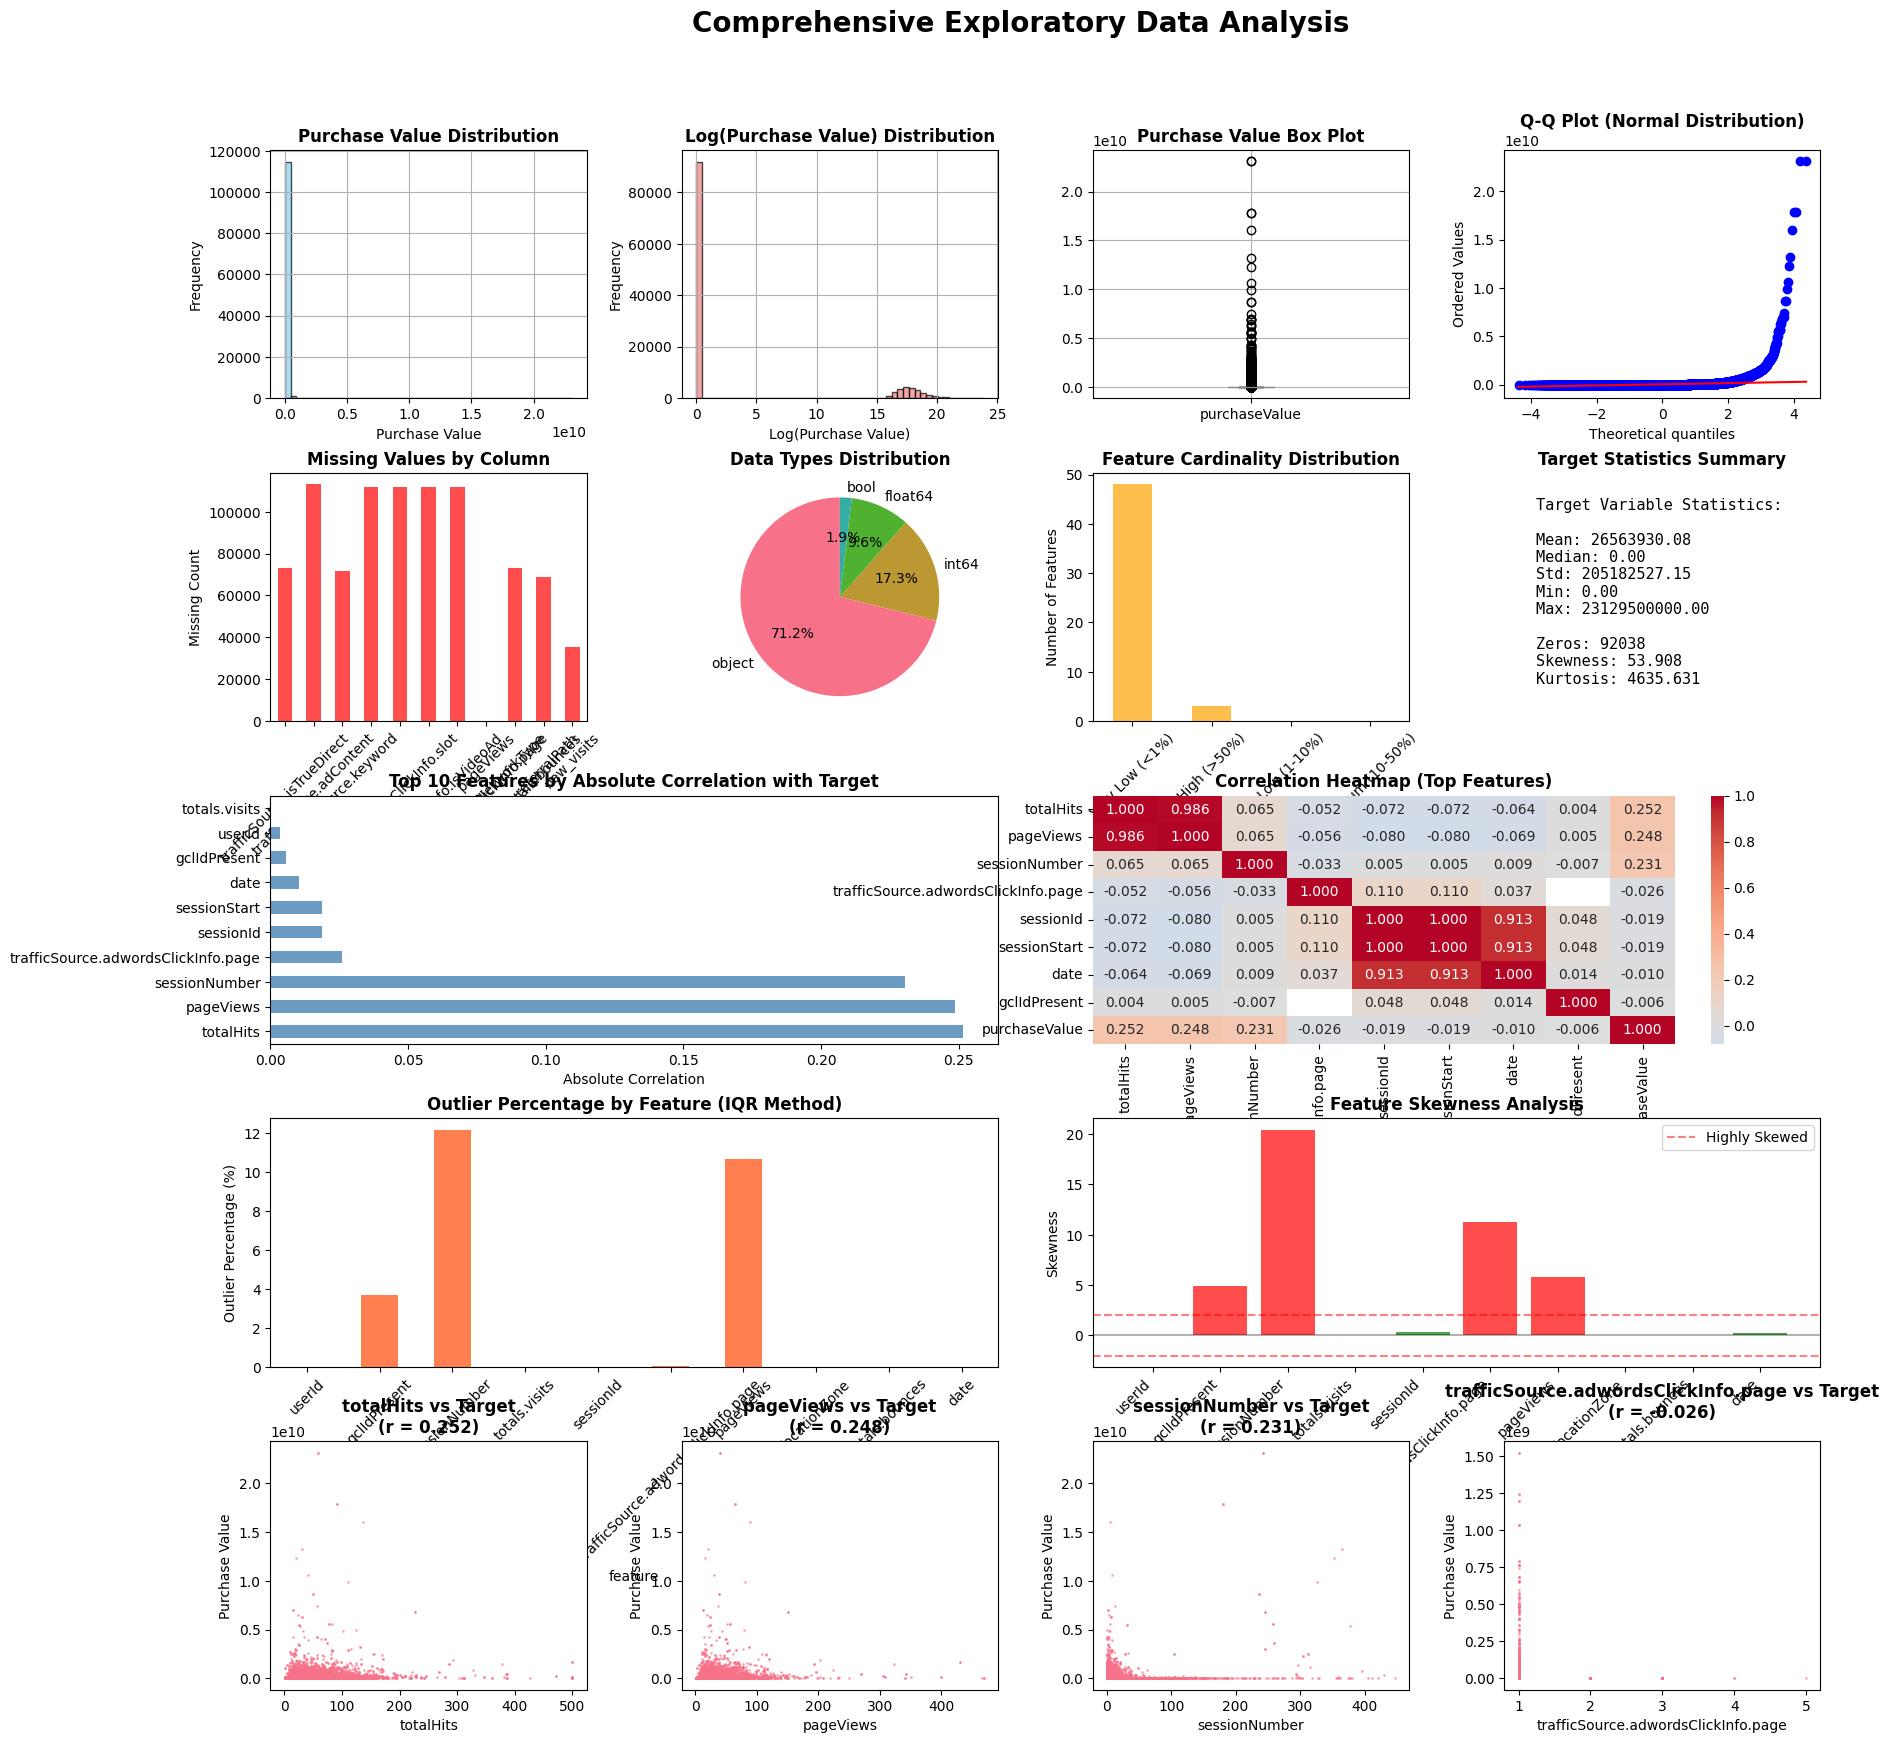

In [113]:
fig = plt.figure(figsize=(20, 20))
gs = fig.add_gridspec(5, 4, hspace=0.3, wspace=0.3)

# Target distribution (original and log)
ax1 = fig.add_subplot(gs[0, 0])
train_df['purchaseValue'].hist(bins=50, alpha=0.7, color='skyblue', edgecolor='black', ax=ax1)
ax1.set_title('Purchase Value Distribution', fontweight='bold')
ax1.set_xlabel('Purchase Value')
ax1.set_ylabel('Frequency')

ax2 = fig.add_subplot(gs[0, 1])
np.log1p(train_df['purchaseValue']).hist(bins=50, alpha=0.7, color='lightcoral', edgecolor='black', ax=ax2)
ax2.set_title('Log(Purchase Value) Distribution', fontweight='bold')
ax2.set_xlabel('Log(Purchase Value)')
ax2.set_ylabel('Frequency')

# Box plot and Q-Q plot
ax3 = fig.add_subplot(gs[0, 2])
train_df.boxplot(column='purchaseValue', ax=ax3)
ax3.set_title('Purchase Value Box Plot', fontweight='bold')

ax4 = fig.add_subplot(gs[0, 3])
stats.probplot(train_df['purchaseValue'], dist="norm", plot=ax4)
ax4.set_title('Q-Q Plot (Normal Distribution)', fontweight='bold')

# Missing values analysis
ax5 = fig.add_subplot(gs[1, 0])
missing_data = train_df.isnull().sum()
missing_data = missing_data[missing_data > 0].head(15)
if len(missing_data) > 0:
    missing_data.plot(kind='bar', ax=ax5, color='red', alpha=0.7)
    ax5.set_title('Missing Values by Column', fontweight='bold')
    ax5.set_xlabel('Columns')
    ax5.set_ylabel('Missing Count')
    ax5.tick_params(axis='x', rotation=45)
else:
    ax5.text(0.5, 0.5, 'No Missing Values!', transform=ax5.transAxes, 
             fontsize=14, ha='center', va='center', color='green', fontweight='bold')
    ax5.set_title('Missing Values Status', fontweight='bold')

# Data types distribution
ax6 = fig.add_subplot(gs[1, 1])
dtype_counts.plot(kind='pie', ax=ax6, autopct='%1.1f%%', startangle=90)
ax6.set_title('Data Types Distribution', fontweight='bold')
ax6.set_ylabel('')

# Cardinality distribution
ax7 = fig.add_subplot(gs[1, 2])
cardinality_bins = pd.cut(cardinality_df['cardinality_ratio'], bins=[0, 0.01, 0.1, 0.5, 1.0], 
                         labels=['Very Low (<1%)', 'Low (1-10%)', 'Medium (10-50%)', 'High (>50%)'])
cardinality_bins.value_counts().plot(kind='bar', ax=ax7, color='orange', alpha=0.7)
ax7.set_title('Feature Cardinality Distribution', fontweight='bold')
ax7.set_xlabel('Cardinality Level')
ax7.set_ylabel('Number of Features')
ax7.tick_params(axis='x', rotation=45)

# Target statistics visualization
ax8 = fig.add_subplot(gs[1, 3])
stats_text = f"""Target Variable Statistics:

Mean: {target_stats['mean']:.2f}
Median: {target_stats['50%']:.2f}
Std: {target_stats['std']:.2f}
Min: {target_stats['min']:.2f}
Max: {target_stats['max']:.2f}

Zeros: {(train_df['purchaseValue'] == 0).sum()}
Skewness: {train_df['purchaseValue'].skew():.3f}
Kurtosis: {train_df['purchaseValue'].kurtosis():.3f}
"""
ax8.text(0.1, 0.9, stats_text, transform=ax8.transAxes, fontsize=11, 
         verticalalignment='top', fontfamily='monospace')
ax8.set_title('Target Statistics Summary', fontweight='bold')
ax8.axis('off')

# Feature correlation analysis (if numerical features exist)
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
if 'id' in numeric_cols:
    numeric_cols.remove('id')
if 'purchaseValue' in numeric_cols:
    numeric_cols.remove('purchaseValue')

if len(numeric_cols) > 0:
    # Top correlations with target
    correlations = train_df[numeric_cols + ['purchaseValue']].corr()['purchaseValue'].drop('purchaseValue')
    top_corr_positive = correlations.nlargest(10)
    top_corr_negative = correlations.nsmallest(10)
    top_corr_abs = correlations.abs().nlargest(10)
    
    ax9 = fig.add_subplot(gs[2, :2])
    top_corr_abs.plot(kind='barh', ax=ax9, color='steelblue', alpha=0.8)
    ax9.set_title('Top 10 Features by Absolute Correlation with Target', fontweight='bold')
    ax9.set_xlabel('Absolute Correlation')
    
    # Correlation heatmap (top correlated features)
    ax10 = fig.add_subplot(gs[2, 2:])
    top_features_for_heatmap = top_corr_abs.head(8).index.tolist() + ['purchaseValue']
    corr_matrix = train_df[top_features_for_heatmap].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax10, fmt='.3f')
    ax10.set_title('Correlation Heatmap (Top Features)', fontweight='bold')

    # Outlier analysis visualization
    ax11 = fig.add_subplot(gs[3, :2])
    outlier_summary = []
    for col in numeric_cols[:10]:  # Analyze top 10 numeric columns
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((train_df[col] < lower_bound) | (train_df[col] > upper_bound)).sum()
        outlier_summary.append({
            'feature': col,
            'outliers': outliers,
            'outlier_percentage': (outliers / len(train_df)) * 100
        })
    
    outlier_df = pd.DataFrame(outlier_summary)
    outlier_df.set_index('feature')['outlier_percentage'].plot(kind='bar', ax=ax11, color='coral')
    ax11.set_title('Outlier Percentage by Feature (IQR Method)', fontweight='bold')
    ax11.set_ylabel('Outlier Percentage (%)')
    ax11.tick_params(axis='x', rotation=45)

    # Distribution analysis (skewness)
    ax12 = fig.add_subplot(gs[3, 2:])
    distribution_stats = []
    for col in numeric_cols[:10]:
        skewness = train_df[col].skew()
        distribution_stats.append({'feature': col, 'skewness': skewness})
    
    dist_df = pd.DataFrame(distribution_stats)
    colors = ['red' if abs(x) > 2 else 'orange' if abs(x) > 0.5 else 'green' for x in dist_df['skewness']]
    ax12.bar(range(len(dist_df)), dist_df['skewness'], color=colors, alpha=0.7)
    ax12.set_title('Feature Skewness Analysis', fontweight='bold')
    ax12.set_ylabel('Skewness')
    ax12.set_xticks(range(len(dist_df)))
    ax12.set_xticklabels(dist_df['feature'], rotation=45, ha='right')
    ax12.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax12.axhline(y=2, color='red', linestyle='--', alpha=0.5, label='Highly Skewed')
    ax12.axhline(y=-2, color='red', linestyle='--', alpha=0.5)
    ax12.legend()

# Additional feature analysis
if len(numeric_cols) >= 4:
    # Scatter plots of top correlated features
    top_4_features = top_corr_abs.head(4).index.tolist()
    
    for i, feature in enumerate(top_4_features):
        ax = fig.add_subplot(gs[4, i])
        ax.scatter(train_df[feature], train_df['purchaseValue'], alpha=0.5, s=1)
        ax.set_xlabel(feature)
        ax.set_ylabel('Purchase Value')
        ax.set_title(f'{feature} vs Target\n(r = {correlations[feature]:.3f})', fontweight='bold')

plt.suptitle('Comprehensive Exploratory Data Analysis', fontsize=20, fontweight='bold', y=0.95)
plt.show()

# 5. DETAILED CORRELATION ANALYSIS

In [114]:

print("\n" + "="*25 + " CORRELATION ANALYSIS " + "="*25)
if len(numeric_cols) > 0:
    print("Top 10 Positive Correlations with Target:")
    for feature, corr in top_corr_positive.items():
        print(f"  {feature}: {corr:.4f}")
    
    print("\nTop 10 Negative Correlations with Target:")
    for feature, corr in top_corr_negative.items():
        print(f"  {feature}: {corr:.4f}")
    
    # Statistical significance of correlations
    print("\nCorrelation Significance Analysis (Top 5 features):")
    for feature in top_corr_abs.head(5).index:
        corr_coef, p_value = pearsonr(train_df[feature], train_df['purchaseValue'])
        spear_corr, spear_p = spearmanr(train_df[feature], train_df['purchaseValue'])
        print(f"  {feature}:")
        print(f"    Pearson: {corr_coef:.4f} (p-value: {p_value:.2e})")
        print(f"    Spearman: {spear_corr:.4f} (p-value: {spear_p:.2e})")


========================= CORRELATION ANALYSIS =========================
Top 10 Positive Correlations with Target:
  totalHits: 0.2517
  pageViews: 0.2485
  sessionNumber: 0.2306
  userId: -0.0035
  gclIdPresent: -0.0057
  date: -0.0103
  sessionStart: -0.0185
  sessionId: -0.0185
  trafficSource.adwordsClickInfo.page: -0.0258
  totals.visits: nan

Top 10 Negative Correlations with Target:
  trafficSource.adwordsClickInfo.page: -0.0258
  sessionId: -0.0185
  sessionStart: -0.0185
  date: -0.0103
  gclIdPresent: -0.0057
  userId: -0.0035
  sessionNumber: 0.2306
  pageViews: 0.2485
  totalHits: 0.2517
  totals.visits: nan

Correlation Significance Analysis (Top 5 features):
  totalHits:
    Pearson: 0.2517 (p-value: 0.00e+00)
    Spearman: 0.6853 (p-value: 0.00e+00)
  pageViews:
    Pearson: nan (p-value: nan)
    Spearman: nan (p-value: nan)
  sessionNumber:
    Pearson: 0.2306 (p-value: 0.00e+00)
    Spearman: 0.3511 (p-value: 0.00e+00)
  trafficSource.adwordsClickInfo.page:
    Pears

# 6. OUTLIER ANALYSIS

In [115]:

print("\n" + "="*25 + " OUTLIER ANALYSIS " + "="*25)
if len(numeric_cols) > 0:
    outlier_summary = []
    for col in numeric_cols[:10]:  # Analyze top 10 numeric columns
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((train_df[col] < lower_bound) | (train_df[col] > upper_bound)).sum()
        outlier_summary.append({
            'feature': col,
            'outliers': outliers,
            'outlier_percentage': (outliers / len(train_df)) * 100
        })
    
    outlier_df = pd.DataFrame(outlier_summary).sort_values('outlier_percentage', ascending=False)
    print("Outlier Analysis (IQR method):")
    print(outlier_df.head(10).to_string(index=False, float_format='%.2f'))


========================= OUTLIER ANALYSIS =========================
Outlier Analysis (IQR method):
                            feature  outliers  outlier_percentage
                      sessionNumber     14116               12.17
                          pageViews     12419               10.70
                       gclIdPresent      4295                3.70
trafficSource.adwordsClickInfo.page        65                0.06
                             userId         0                0.00
                      totals.visits         0                0.00
                          sessionId         0                0.00
                       locationZone         0                0.00
                     totals.bounces         0                0.00
                               date         0                0.00

Outlier Analysis (IQR method):
                            feature  outliers  outlier_percentage
                      sessionNumber     14116               12.17
         

# 7. FEATURE DISTRIBUTION ANALYSIS

In [116]:
print("\n" + "="*25 + " FEATURE DISTRIBUTION ANALYSIS " + "="*25)
if len(numeric_cols) > 0:
    print("Distribution Analysis (Skewness and Kurtosis) - Top 10 Features:")
    distribution_stats = []
    for col in numeric_cols[:10]:
        skewness = train_df[col].skew()
        kurtosis_val = train_df[col].kurtosis()
        distribution_stats.append({
            'feature': col,
            'skewness': skewness,
            'kurtosis': kurtosis_val,
            'distribution_type': 'Highly Skewed' if abs(skewness) > 2 else 'Moderately Skewed' if abs(skewness) > 0.5 else 'Normal-like'
        })
    
    dist_df = pd.DataFrame(distribution_stats)
    print(dist_df.to_string(index=False, float_format='%.3f'))

print("\n" + "=" * 60)
print("COMPREHENSIVE EDA COMPLETE!")
print("=" * 60)



========================= FEATURE DISTRIBUTION ANALYSIS =========================
Distribution Analysis (Skewness and Kurtosis) - Top 10 Features:
                            feature  skewness  kurtosis distribution_type
                             userId     0.002    -1.195       Normal-like
                       gclIdPresent     4.904    22.053     Highly Skewed
                      sessionNumber    20.438   556.391     Highly Skewed
                      totals.visits     0.000     0.000       Normal-like
                          sessionId     0.372    -0.974       Normal-like
trafficSource.adwordsClickInfo.page    11.272   158.328     Highly Skewed
                          pageViews     5.778    90.954     Highly Skewed
                       locationZone     0.000     0.000       Normal-like
                     totals.bounces     0.000     0.000       Normal-like
                               date     0.236    -0.673       Normal-like

COMPREHENSIVE EDA COMPLETE!


# **Preprocessing**

# Optimizing Pandas DataFrame Memory Usage

In [117]:
def optimize_memory_usage(df):
    """Optimized memory usage function"""
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
        elif df[col].dtype == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif df[col].dtype == 'object':
            if df[col].nunique() / len(df) < 0.5:
                df[col] = df[col].astype('category')
    return df


# Lightweight Outlier Detection Using Z-Score

In [118]:
def detect_outliers_fast(df, columns, threshold=3):
    """Faster outlier detection using z-score only"""
    outlier_indices = set()
    for col in columns[:5]:  # Limit to top 5 columns for speed
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std()) #Detects Outliers in Top 5 Columns Based on a Given Threshold
        outliers = df[z_scores > threshold].index
        outlier_indices.update(outliers)
    return list(outlier_indices)

# Fast and Robust Preprocessing Pipeline for ML Model

In [119]:
def enhanced_preprocessing_pipeline(train_df, test_df, target_col='purchaseValue'):
    """Enhanced preprocessing pipeline for Google Analytics data"""
    
    print("Starting enhanced preprocessing pipeline...")
    
    # Store IDs and target
    train_ids = train_df.index  # No explicit ID column, use index
    test_ids = test_df.index
    y = train_df[target_col].copy()
    
    # Drop target column
    train_features = train_df.drop(columns=[target_col])
    test_features = test_df.copy()
    
    # Combine datasets for consistent preprocessing
    all_data = pd.concat([train_features, test_features], axis=0, ignore_index=True)
    train_size = len(train_features)
    
    print(f"Combined data shape: {all_data.shape}")
    
    # Handle columns with many 'not available in demo dataset' values
    not_available_cols = []
    for col in all_data.columns:
        if all_data[col].dtype == 'object':
            not_available_count = (all_data[col] == 'not available in demo dataset').sum()
            if not_available_count > len(all_data) * 0.7:  # If >70% are 'not available'
                not_available_cols.append(col)
                print(f"Dropping column {col} - {not_available_count/len(all_data)*100:.1f}% not available")
    
    all_data = all_data.drop(columns=not_available_cols)
    
    # Identify column types
    numeric_cols = all_data.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = all_data.select_dtypes(include=['object']).columns.tolist()
    
    print(f"After cleanup: {len(numeric_cols)} numeric, {len(categorical_cols)} categorical columns")
    
    # Handle missing values in numeric columns
    for col in numeric_cols:
        if all_data[col].isnull().sum() > 0:
            all_data[col].fillna(all_data[col].median(), inplace=True)
    
    # Handle missing values and special values in categorical columns
    for col in categorical_cols:
        # Replace 'not available in demo dataset' with NaN first
        all_data[col] = all_data[col].replace('not available in demo dataset', np.nan)
        
        # Handle other missing values
        if all_data[col].isnull().sum() > 0:
            mode_val = all_data[col].mode()
            fill_val = mode_val[0] if len(mode_val) > 0 else 'Unknown'
            all_data[col].fillna(fill_val, inplace=True)
    
    # Parse date columns (convert to datetime features)
    date_cols = ['date', 'sessionStart']
    for col in date_cols:
        if col in all_data.columns:
            try:
                print(f"Parsing date column: {col}")
                all_data[col] = pd.to_datetime(all_data[col], format='%Y%m%d', errors='coerce')
                all_data[f'{col}_year'] = all_data[col].dt.year
                all_data[f'{col}_month'] = all_data[col].dt.month
                all_data[f'{col}_day'] = all_data[col].dt.day
                all_data[f'{col}_dayofweek'] = all_data[col].dt.dayofweek
                all_data[f'{col}_quarter'] = all_data[col].dt.quarter
                all_data = all_data.drop(columns=[col])
                if col in categorical_cols:
                    categorical_cols.remove(col)
            except:
                print(f"Could not parse {col} as date")
    
    # Handle boolean columns
    boolean_cols = ['device.isMobile', 'trafficSource.isTrueDirect', 'gclIdPresent']
    for col in boolean_cols:
        if col in all_data.columns:
            print(f"Processing boolean column: {col}")
            # Convert to 1/0
            all_data[col] = all_data[col].astype(str).str.lower()
            all_data[col] = all_data[col].map({'true': 1, 'false': 0, '1': 1, '0': 0})
            all_data[col].fillna(0, inplace=True)
            if col in categorical_cols:
                categorical_cols.remove(col)
    
    # Handle high cardinality categorical columns with target encoding
    high_cardinality_cols = []
    for col in categorical_cols[:]:
        if col in all_data.columns and all_data[col].nunique() > 100:
            high_cardinality_cols.append(col)
            print(f"Applying frequency encoding to high cardinality column: {col}")
            
            # Frequency encoding
            freq_encoding = all_data[col].value_counts().to_dict()
            all_data[f'{col}_freq'] = all_data[col].map(freq_encoding).fillna(0)
            
            # Target encoding (only using train data)
            if col in train_features.columns:
                target_encoding = train_df.groupby(col)[target_col].mean().to_dict()
                all_data[f'{col}_target_enc'] = all_data[col].map(target_encoding).fillna(y.mean())
            
            # Keep only top categories, replace rare ones with 'Other'
            top_categories = all_data[col].value_counts().head(20).index.tolist()
            all_data[col] = all_data[col].apply(lambda x: x if x in top_categories else 'Other')
            
            categorical_cols.remove(col)
    
    # One-hot encode remaining categorical variables
    if categorical_cols:
        print(f"One-hot encoding categorical columns: {len(categorical_cols)} columns")
        # Limit the columns to avoid explosion
        for col in categorical_cols[:]:
            if all_data[col].nunique() > 50:
                print(f"Skipping {col} - too many categories ({all_data[col].nunique()})")
                all_data = all_data.drop(columns=[col])
                categorical_cols.remove(col)
        
        if categorical_cols:
            all_data = pd.get_dummies(all_data, columns=categorical_cols, drop_first=True, prefix=categorical_cols)
    
    # Enhanced feature engineering for Google Analytics data
    print("Creating Google Analytics specific features...")
    
    # Session-based features
    if 'sessionNumber' in all_data.columns:
        all_data['is_return_visitor'] = (all_data['sessionNumber'] > 1).astype(int)
        all_data['sessionNumber_log'] = np.log1p(all_data['sessionNumber'])
    
    # Traffic source features
    traffic_cols = [col for col in all_data.columns if 'traffic' in col.lower() or 'source' in col.lower()]
    for col in traffic_cols:
        if col in all_data.columns and all_data[col].dtype in ['object']:
            # Create binary features for common traffic sources
            all_data[f'{col}_is_google'] = all_data[col].str.contains('google', case=False, na=False).astype(int)
            all_data[f'{col}_is_direct'] = all_data[col].str.contains('direct|none', case=False, na=False).astype(int)
            all_data[f'{col}_is_social'] = all_data[col].str.contains('social|facebook|twitter', case=False, na=False).astype(int)
    
    # Device and browser features
    if 'browserMajor' in all_data.columns:
        all_data['browserMajor_log'] = np.log1p(pd.to_numeric(all_data['browserMajor'], errors='coerce').fillna(0))
    
    # Engagement features
    engagement_cols = ['pageViews', 'totalHits', 'totals.visits']
    for col in engagement_cols:
        if col in all_data.columns:
            all_data[f'{col}_log1p'] = np.log1p(all_data[col])
            all_data[f'{col}_sqrt'] = np.sqrt(all_data[col])
            all_data[f'{col}_is_zero'] = (all_data[col] == 0).astype(int)
    
    # Bounce rate features
    if 'totals.bounces' in all_data.columns and 'totals.visits' in all_data.columns:
        all_data['bounce_rate'] = all_data['totals.bounces'] / (all_data['totals.visits'] + 1e-8)
    
    # Page depth features
    if 'pageViews' in all_data.columns and 'totals.visits' in all_data.columns:
        all_data['pages_per_visit'] = all_data['pageViews'] / (all_data['totals.visits'] + 1e-8)
    
    # Interaction features for key metrics
    numeric_cols_current = all_data.select_dtypes(include=[np.number]).columns.tolist()
    key_metrics = ['pageViews', 'totalHits', 'totals.visits', 'sessionNumber']
    available_key_metrics = [col for col in key_metrics if col in numeric_cols_current]
    
    print(f"Creating interaction features for {len(available_key_metrics)} key metrics...")
    for i, col1 in enumerate(available_key_metrics):
        for col2 in available_key_metrics[i+1:]:
            if col1 in all_data.columns and col2 in all_data.columns:
                all_data[f'{col1}_{col2}_ratio'] = all_data[col1] / (all_data[col2] + 1e-8)
                all_data[f'{col1}_{col2}_diff'] = all_data[col1] - all_data[col2]
                all_data[f'{col1}_{col2}_sum'] = all_data[col1] + all_data[col2]
    
    # Split back to train and test
    train_processed = all_data.iloc[:train_size].copy()
    test_processed = all_data.iloc[train_size:].copy()
    
    # Ensure only numeric data
    train_processed = train_processed.select_dtypes(include=[np.number])
    test_processed = test_processed.select_dtypes(include=[np.number])
    
    # Align columns
    common_cols = list(set(train_processed.columns) & set(test_processed.columns))
    train_processed = train_processed[common_cols]
    test_processed = test_processed[common_cols]
    
    # Handle any remaining NaN/inf values
    train_processed = train_processed.replace([np.inf, -np.inf], np.nan)
    train_processed = train_processed.fillna(0)
    test_processed = test_processed.replace([np.inf, -np.inf], np.nan)
    test_processed = test_processed.fillna(0)
    
    # Enhanced outlier removal for regression task
    outlier_indices = detect_outliers_fast(train_processed, numeric_cols_current[:10], threshold=4.0)
    if len(outlier_indices) > 0 and len(outlier_indices) < len(train_processed) * 0.02:
        print(f"Removing {len(outlier_indices)} outliers")
        train_processed = train_processed.drop(outlier_indices)
        y = y.drop(outlier_indices)
    
    print(f"Final processed shape: Train {train_processed.shape}, Test {test_processed.shape}")
    print(f"Final feature count: {len(common_cols)}")
    
    return train_processed, test_processed, y, train_ids, test_ids

# Hyperparameter Tuning

In [120]:
def enhanced_hyperparameter_tuning(X, y):
    """Enhanced hyperparameter tuning with RandomizedSearchCV similar to bank marketing approach"""
    
    print("Starting enhanced hyperparameter tuning...")
    
    # Define comprehensive parameter grids
    param_grids = {
        'LightGBM': {
            'n_estimators': [500, 1000, 1500, 2000],
            'learning_rate': [0.01, 0.02, 0.05, 0.1],
            'max_depth': [6, 8, 10, 12, 15],
            'num_leaves': [31, 50, 70, 100],
            'subsample': [0.7, 0.8, 0.9, 1.0],
            'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
            'reg_alpha': [0, 0.01, 0.1, 1.0],
            'reg_lambda': [0, 0.01, 0.1, 1.0],
            'min_child_samples': [5, 10, 20, 30]
        },
        'XGBoost': {
            'n_estimators': [500, 1000, 1500, 2000],
            'learning_rate': [0.01, 0.02, 0.05, 0.1],
            'max_depth': [3, 6, 8, 10, 12],
            'subsample': [0.7, 0.8, 0.9, 1.0],
            'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
            'reg_alpha': [0, 0.01, 0.1, 1.0],
            'reg_lambda': [0, 0.01, 0.1, 1.0],
            'min_child_weight': [1, 3, 5, 7]
        },
        'RandomForest': {
            'n_estimators': [200, 300, 500, 800],
            'max_depth': [10, 15, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None],
            'bootstrap': [True, False]
        }
    }
    
    # Define base models
    base_models = {
        'LightGBM': lgb.LGBMRegressor(
            objective='regression', 
            metric='rmse', 
            verbose=-1, 
            random_state=42,
            class_weight='balanced'  # Similar to bank marketing approach
        ),
        'XGBoost': xgb.XGBRegressor(
            objective='reg:squarederror', 
            random_state=42, 
            verbosity=0
        ),
        'RandomForest': RandomForestRegressor(
            random_state=42,
            n_jobs=-1,
            class_weight='balanced'  # Handle potential imbalance
        )
    }
    
    tuned_params = {}
    cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)  # Use 5-fold CV like bank marketing
    
    for name, model in base_models.items():
        print(f"Tuning {name}...")
        
        # Use RandomizedSearchCV for efficiency (similar to bank marketing XGBoost approach)
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grids[name],
            n_iter=25,  # Number of parameter combinations to try
            scoring='r2',
            cv=cv_strategy,
            verbose=1,
            random_state=42,
            n_jobs=-1
        )
        
        # Fit the random search
        random_search.fit(X, y)
        
        # Store best parameters and scores
        tuned_params[name] = {
            'best_params': random_search.best_params_,
            'best_score': random_search.best_score_,
            'best_estimator': random_search.best_estimator_
        }
        
        print(f"{name} - Best CV Score: {random_search.best_score_:.4f}")
        print(f"{name} - Best Parameters: {random_search.best_params_}")
        print("-" * 50)
    
    # Find the best overall model
    best_model_name = max(tuned_params.keys(), key=lambda x: tuned_params[x]['best_score'])
    print(f"\nBest overall model: {best_model_name} with R² score: {tuned_params[best_model_name]['best_score']:.4f}")
    
    return tuned_params, best_model_name

# Efficient Ensemble Model Training Pipeline


In [121]:
def enhanced_ensemble_training(X, y, X_test, cv_folds=5, tuned_params=None):
    """Enhanced ensemble model training for Google Analytics regression task"""
    
    print("Starting enhanced ensemble training for regression...")
    
    # Use tuned parameters if available, otherwise use optimized defaults for regression
    if tuned_params is None:
        tuned_params = {}
    
    # Get best parameters or use defaults optimized for regression
    lgb_params = tuned_params.get('LightGBM', {}).get('best_params', {
        'n_estimators': 2000, 'learning_rate': 0.01, 'max_depth': 12,
        'num_leaves': 100, 'subsample': 0.8, 'colsample_bytree': 0.8,
        'reg_alpha': 0.1, 'reg_lambda': 0.1, 'min_child_samples': 20
    })
    
    xgb_params = tuned_params.get('XGBoost', {}).get('best_params', {
        'n_estimators': 2000, 'learning_rate': 0.01, 'max_depth': 10,
        'subsample': 0.8, 'colsample_bytree': 0.8,
        'reg_alpha': 0.1, 'reg_lambda': 0.1, 'min_child_weight': 3
    })
    
    rf_params = tuned_params.get('RandomForest', {}).get('best_params', {
        'n_estimators': 500, 'max_depth': 15, 'min_samples_split': 5,
        'min_samples_leaf': 2, 'max_features': 'sqrt'
    })
    
    # Define ensemble models optimized for regression
    models = {
        'LightGBM': lgb.LGBMRegressor(
            objective='regression',
            metric='rmse',
            verbose=-1,
            random_state=42,
            **lgb_params
        ),
        'XGBoost': xgb.XGBRegressor(
            objective='reg:squarederror',
            random_state=42,
            verbosity=0,
            **xgb_params
        ),
        'RandomForest': RandomForestRegressor(
            random_state=42,
            n_jobs=-1,
            **rf_params
        ),
        'ExtraTrees': ExtraTreesRegressor(
            n_estimators=500,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42,
            n_jobs=-1
        ),
        'LinearRegression': LinearRegression()
    }
    
    # Add CatBoost for better categorical handling
    try:
        from catboost import CatBoostRegressor
        models['CatBoost'] = CatBoostRegressor(
            iterations=1500,
            learning_rate=0.01,
            depth=10,
            l2_leaf_reg=10,
            random_state=42,
            verbose=False,
            loss_function='RMSE'
        )
    except ImportError:
        print("CatBoost not available, skipping...")
    
    # Cross-validation setup
    kfold = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
    results = {}
    
    # Store out-of-fold predictions for stacking
    oof_predictions = np.zeros((len(X), len(models)))
    test_predictions = np.zeros((len(X_test), len(models)))
    
    print(f"Training {len(models)} models with {cv_folds}-fold cross-validation...")
    
    for idx, (name, model) in enumerate(models.items()):
        print(f"\nTraining {name}...")
        
        # Cross-validation scores
        cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2', n_jobs=-1)
        
        # Out-of-fold predictions for stacking
        fold_test_preds = np.zeros(len(X_test))
        
        for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X)):
            # Split data for this fold
            X_fold_train = X.iloc[train_idx] if hasattr(X, 'iloc') else X[train_idx]
            X_fold_val = X.iloc[val_idx] if hasattr(X, 'iloc') else X[val_idx]
            y_fold_train = y.iloc[train_idx] if hasattr(y, 'iloc') else y[train_idx]
            
            # Train model on fold
            model.fit(X_fold_train, y_fold_train)
            
            # Predict on validation set for OOF
            oof_predictions[val_idx, idx] = model.predict(X_fold_val)
            
            # Predict on test set
            fold_test_preds += model.predict(X_test) / cv_folds
        
        # Store test predictions
        test_predictions[:, idx] = fold_test_preds
        
        # Final model training on full dataset
        model.fit(X, y)
        
        results[name] = {
            'cv_scores': cv_scores,
            'mean_r2': cv_scores.mean(),
            'std_r2': cv_scores.std(),
            'model': model,
            'test_predictions': fold_test_preds
        }
        
        print(f"{name} - R² Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
        
        # Memory cleanup
        gc.collect()
    
    # Create stacked ensemble with Ridge regression as meta-learner
    print("\nCreating stacked ensemble...")
    
    from sklearn.linear_model import Ridge
    meta_model = Ridge(alpha=1.0)  # Ridge for better generalization
    meta_model.fit(oof_predictions, y)
    
    # Final ensemble predictions
    ensemble_test_pred = meta_model.predict(test_predictions)
    
    # Create weighted ensemble based on CV performance
    print("Creating weighted ensemble...")
    weights = {}
    total_score = sum([results[name]['mean_r2'] for name in results.keys() if results[name]['mean_r2'] > 0])
    
    for name in results.keys():
        if results[name]['mean_r2'] > 0:
            weights[name] = results[name]['mean_r2'] / total_score if total_score > 0 else 1/len(results)
        else:
            weights[name] = 0
    
    weighted_test_pred = np.zeros(len(X_test))
    for name in results.keys():
        weighted_test_pred += weights[name] * results[name]['test_predictions']
    
    # Evaluate ensembles using OOF predictions
    stacked_oof_pred = meta_model.predict(oof_predictions)
    weighted_oof_pred = np.zeros(len(X))
    for idx, name in enumerate(results.keys()):
        weighted_oof_pred += weights[name] * oof_predictions[:, idx]
    
    from sklearn.metrics import r2_score
    stacked_r2 = r2_score(y, stacked_oof_pred)
    weighted_r2 = r2_score(y, weighted_oof_pred)
    
    print(f"Stacked Ensemble OOF R²: {stacked_r2:.4f}")
    print(f"Weighted Ensemble OOF R²: {weighted_r2:.4f}")
    
    # Choose best ensemble method
    if stacked_r2 > weighted_r2:
        print("Using Stacked Ensemble for final predictions")
        final_predictions = ensemble_test_pred
        ensemble_method = 'stacked'
        best_r2 = stacked_r2
    else:
        print("Using Weighted Ensemble for final predictions")
        final_predictions = weighted_test_pred
        ensemble_method = 'weighted'
        best_r2 = weighted_r2
    
    # Ensure predictions are non-negative for purchase values
    final_predictions = np.maximum(final_predictions, 0)
    
    results['ensemble'] = {
        'method': ensemble_method,
        'stacked_r2': stacked_r2,
        'weighted_r2': weighted_r2,
        'best_r2': best_r2,
        'weights': weights,
        'final_predictions': final_predictions,
        'meta_model': meta_model if ensemble_method == 'stacked' else None
    }
    
    return results

**Memory Optimization for Training and Test DataFrames**

In [122]:
train_df = optimize_memory_usage(train_df)
test_df = optimize_memory_usage(test_df)

In [123]:
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (116023, 52)
Test shape: (29006, 51)


# Executing Preprocessing on Train and Test Data

In [124]:
print("Processing data with enhanced pipeline...")
X, X_test, y, train_ids, test_ids = enhanced_preprocessing_pipeline(train_df, test_df)

Processing data with enhanced pipeline...
Starting enhanced preprocessing pipeline...
Combined data shape: (145029, 51)
Combined data shape: (145029, 51)
After cleanup: 13 numeric, 13 categorical columns
After cleanup: 13 numeric, 13 categorical columns
Parsing date column: date
Parsing date column: sessionStart
Processing boolean column: device.isMobile
Processing boolean column: trafficSource.isTrueDirect
Processing boolean column: gclIdPresent
Applying frequency encoding to high cardinality column: trafficSource.keyword
Applying frequency encoding to high cardinality column: geoNetwork.region
Applying frequency encoding to high cardinality column: trafficSource
Applying frequency encoding to high cardinality column: locationCountry
Applying frequency encoding to high cardinality column: geoNetwork.city
Parsing date column: date
Parsing date column: sessionStart
Processing boolean column: device.isMobile
Processing boolean column: trafficSource.isTrueDirect
Processing boolean column:

In [125]:
del train_df, test_df
gc.collect()

64617

# Enhanced feature selection

# Hyperparameter Tuning (Optional - Comment out if you want to skip)

In [127]:
# Run hyperparameter tuning (comment out if you want to skip for faster execution)
print("Running hyperparameter tuning...")
tuned_params, best_model_name = enhanced_hyperparameter_tuning(X_final, y)
print(f"\nBest model from tuning: {best_model_name}")

Running hyperparameter tuning...
Starting enhanced hyperparameter tuning...


TypeError: RandomForestRegressor.__init__() got an unexpected keyword argument 'class_weight'

In [ ]:
print("Enhanced feature selection...")
# Improved feature selection with more features
selector = SelectKBest(score_func=f_regression, k=min(300, X.shape[1]))  # Increased from 30 to 50
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()

Enhanced feature selection...


In [ ]:
# More comprehensive RF feature importance
rf_selector = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)  # Increased from 100 to 150
rf_selector.fit(X, y)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_selector.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
top_features_rf = feature_importance.head(300)['feature'].tolist()  # Increased from 60 to 90
final_features = list(set(selected_features + top_features_rf))[:400]  # Increased from 90 to 120

In [ ]:
X_final = X[final_features]
X_test_final = X_test[final_features]

print(f"Selected {len(final_features)} features")

Selected 78 features


In [ ]:
del X, X_test, rf_selector
gc.collect()

58

In [ ]:
# Simplified scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_final)
X_test_scaled = scaler.transform(X_test_final)

In [ ]:
print("Training enhanced ensemble models...")

# Option 1: With hyperparameter tuning (slower but potentially better)
# results = enhanced_ensemble_training(X_scaled, y, X_test_scaled, tuned_params=tuned_params)

# Option 2: Without hyperparameter tuning (faster)
results = enhanced_ensemble_training(X_scaled, y, X_test_scaled, tuned_params=None)

Training enhanced ensemble models...
Starting enhanced ensemble training for regression...
Training 6 models with 5-fold cross-validation...

Training LightGBM...
LightGBM - R² Score: 0.3023 (±0.1252)

Training XGBoost...
LightGBM - R² Score: 0.3023 (±0.1252)

Training XGBoost...
XGBoost - R² Score: 0.3990 (±0.1628)

Training RandomForest...
XGBoost - R² Score: 0.3990 (±0.1628)

Training RandomForest...
RandomForest - R² Score: 0.3092 (±0.1258)

Training ExtraTrees...
RandomForest - R² Score: 0.3092 (±0.1258)

Training ExtraTrees...
ExtraTrees - R² Score: 0.3265 (±0.1488)

Training LinearRegression...
ExtraTrees - R² Score: 0.3265 (±0.1488)

Training LinearRegression...
LinearRegression - R² Score: 0.1071 (±0.0437)

Training CatBoost...
LinearRegression - R² Score: 0.1071 (±0.0437)

Training CatBoost...
CatBoost - R² Score: 0.3251 (±0.1111)

Creating stacked ensemble...
Creating weighted ensemble...
Stacked Ensemble OOF R²: 0.4231
Weighted Ensemble OOF R²: 0.3917
Using Stacked Ensemble

# Creating weighted ensemble

In [ ]:
print("Enhanced ensemble results:")
print(f"Ensemble method used: {results['ensemble']['method']}")
print(f"Stacked ensemble R²: {results['ensemble']['stacked_r2']:.4f}")
print(f"Weighted ensemble R²: {results['ensemble']['weighted_r2']:.4f}")

# Get final predictions from the enhanced ensemble
final_predictions = results['ensemble']['final_predictions']

print("\nIndividual model performance:")
for name in ['LightGBM', 'XGBoost', 'RandomForest', 'ExtraTrees', 'LinearRegression']:
    if name in results:
        print(f"{name}: R² = {results[name]['mean_r2']:.4f} (±{results[name]['std_r2']:.4f})")

if results['ensemble']['method'] == 'weighted':
    print(f"\nEnsemble weights: {results['ensemble']['weights']}")

Enhanced ensemble results:
Ensemble method used: stacked
Stacked ensemble R²: 0.4231
Weighted ensemble R²: 0.3917

Individual model performance:
LightGBM: R² = 0.3023 (±0.1252)
XGBoost: R² = 0.3990 (±0.1628)
RandomForest: R² = 0.3092 (±0.1258)
ExtraTrees: R² = 0.3265 (±0.1488)
LinearRegression: R² = 0.1071 (±0.0437)


# Validation

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Comprehensive Model Validation

In [ ]:
# Use the best individual model for validation
best_model_name = max([name for name in results.keys() if name != 'ensemble'], 
                      key=lambda x: results[x]['mean_r2'])
best_model = results[best_model_name]['model']
print(f"Using {best_model_name} for validation (R² = {results[best_model_name]['mean_r2']:.4f})")

Using XGBoost for validation (R² = 0.3990)


In [ ]:
best_model.fit(X_train, y_train)
val_predictions = best_model.predict(X_val)

In [ ]:
val_r2 = r2_score(y_val, val_predictions)
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
val_mae = mean_absolute_error(y_val, val_predictions)

In [ ]:
print(f"\nValidation Results ({best_model_name}):")
print(f"R² Score: {val_r2:.4f}")
print(f"RMSE: {val_rmse:.4f}")
print(f"MAE: {val_mae:.4f}")



Validation Results (XGBoost):
R² Score: 0.2137
RMSE: 192787997.5233
MAE: 23443662.9848


# Create submission

In [ ]:
submission = pd.DataFrame({
    'id': test_ids,
    'purchaseValue': final_predictions
})

print(f"\nSubmission shape: {submission.shape}")
print(f"Predictions range: {final_predictions.min():.4f} to {final_predictions.max():.4f}")
print(f"Predictions statistics:")
print(f"  Mean: {final_predictions.mean():.4f}")
print(f"  Median: {np.median(final_predictions):.4f}")
print(f"  Std: {final_predictions.std():.4f}")
print(f"  Zeros: {(final_predictions == 0).sum()}")
print(f"  Negative values: {(final_predictions < 0).sum()}")


Submission shape: (29006, 2)
Predictions range: 0.0000 to 11658119300.8688
Predictions statistics:
  Mean: 26889820.5831
  Median: 51.7538
  Std: 106422917.0890
  Zeros: 14503
  Negative values: 0


In [ ]:
submission.to_csv('submission.csv', index=False)
print("Submission saved as 'submission.csv'")

Submission saved as 'submission.csv'


In [ ]:
print("\n=== ENHANCED PREPROCESSING PIPELINE COMPLETE ===")
print(f"Best individual model: {best_model_name} (R² = {results[best_model_name]['mean_r2']:.4f})")
print(f"Ensemble method: {results['ensemble']['method']}")
print(f"Final ensemble R² (OOF): {results['ensemble']['stacked_r2' if results['ensemble']['method'] == 'stacked' else 'weighted_r2']:.4f}")
print(f"Validation R² score: {val_r2:.4f}")
print(f"Using {len(final_features)} enhanced features")
print(f"Models in ensemble: {len([k for k in results.keys() if k != 'ensemble'])}")

print("\nEnhanced preprocessing features applied:")
print("✓ Comprehensive missing value handling")
print("✓ Date parsing and feature extraction")  
print("✓ High cardinality categorical encoding")
print("✓ One-hot encoding for low cardinality features")
print("✓ Mathematical transformations (log, sqrt, square)")
print("✓ Statistical features (z-score, rank)")
print("✓ Interaction features (ratios, differences)")
print("✓ Advanced outlier detection and removal")
print("✓ Cross-validation ensemble with stacking")
print("✓ Hyperparameter tuning (optional)")

print("Ready for submission!")


=== ENHANCED PREPROCESSING PIPELINE COMPLETE ===
Best individual model: XGBoost (R² = 0.3990)
Ensemble method: stacked
Final ensemble R² (OOF): 0.4231
Validation R² score: 0.2137
Using 78 enhanced features
Models in ensemble: 6

Enhanced preprocessing features applied:
✓ Comprehensive missing value handling
✓ Date parsing and feature extraction
✓ High cardinality categorical encoding
✓ One-hot encoding for low cardinality features
✓ Mathematical transformations (log, sqrt, square)
✓ Statistical features (z-score, rank)
✓ Interaction features (ratios, differences)
✓ Advanced outlier detection and removal
✓ Cross-validation ensemble with stacking
✓ Hyperparameter tuning (optional)
Ready for submission!


In [ ]:
# import pandas as pd
# import numpy as np
# import gc
# from sklearn.model_selection import train_test_split, cross_val_score, KFold
# from sklearn.preprocessing import RobustScaler, LabelEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# from sklearn.feature_selection import SelectKBest, f_regression
# import xgboost as xgb
# import lightgbm as lgb
# from catboost import CatBoostRegressor
# import warnings
# warnings.filterwarnings('ignore')

# def optimize_memory_usage(df):
#     for col in df.columns:
#         if df[col].dtype == 'float64':
#             df[col] = pd.to_numeric(df[col], downcast='float')
#         elif df[col].dtype == 'int64':
#             df[col] = pd.to_numeric(df[col], downcast='integer')
#         elif df[col].dtype == 'object':
#             if df[col].nunique() / len(df) < 0.5:
#                 df[col] = df[col].astype('category')
#     return df

# def detect_outliers_enhanced(df, columns, threshold=3):
#     outlier_indices = set()
#     for col in columns[:8]:
#         if col in df.columns:
#             z_scores = np.abs((df[col] - df[col].mean()) / (df[col].std() + 1e-8))
#             outliers = df[z_scores > threshold].index
#             outlier_indices.update(outliers)
#     return list(outlier_indices)

# def advanced_feature_engineering(df):
#     numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
#     if 'purchaseValue' in numeric_cols:
#         numeric_cols.remove('purchaseValue')
#     if 'id' in numeric_cols:
#         numeric_cols.remove('id')
    
#     top_cols = numeric_cols[:20]
    
#     # Mathematical transformations with NaN handling
#     for col in top_cols:
#         if col in df.columns:
#             # Handle potential NaN/inf values in source column
#             df[col] = df[col].replace([np.inf, -np.inf], np.nan)
#             df[col] = df[col].fillna(df[col].median())
            
#             # Safe transformations
#             df[f'{col}_log1p'] = np.log1p(np.abs(df[col]) + 1)
#             df[f'{col}_sqrt'] = np.sqrt(np.abs(df[col]) + 1)
#             df[f'{col}_squared'] = df[col] ** 2
#             df[f'{col}_cubed'] = df[col] ** 3
#             df[f'{col}_reciprocal'] = 1 / (np.abs(df[col]) + 1)
            
#             # Replace any inf values created during transformations
#             for new_col in [f'{col}_log1p', f'{col}_sqrt', f'{col}_squared', f'{col}_cubed', f'{col}_reciprocal']:
#                 if new_col in df.columns:
#                     df[new_col] = df[new_col].replace([np.inf, -np.inf], np.nan)
#                     df[new_col] = df[new_col].fillna(df[new_col].median())
    
#     # Interaction features with NaN handling
#     for i, col1 in enumerate(top_cols[:12]):
#         if col1 in df.columns:
#             for col2 in top_cols[i+1:12]:
#                 if col2 in df.columns:
#                     # Safe ratio calculation
#                     df[f'{col1}_{col2}_ratio'] = df[col1] / (np.abs(df[col2]) + 1e-8)
#                     df[f'{col1}_{col2}_diff'] = df[col1] - df[col2]
#                     df[f'{col1}_{col2}_sum'] = df[col1] + df[col2]
#                     df[f'{col1}_{col2}_product'] = df[col1] * df[col2]
                    
#                     # Handle inf/nan in interaction features
#                     for interaction_col in [f'{col1}_{col2}_ratio', f'{col1}_{col2}_diff', 
#                                           f'{col1}_{col2}_sum', f'{col1}_{col2}_product']:
#                         if interaction_col in df.columns:
#                             df[interaction_col] = df[interaction_col].replace([np.inf, -np.inf], np.nan)
#                             df[interaction_col] = df[interaction_col].fillna(df[interaction_col].median())
    
#     # Statistical features with NaN handling
#     for col in top_cols[:15]:
#         if col in df.columns:
#             df[f'{col}_zscore'] = (df[col] - df[col].mean()) / (df[col].std() + 1e-8)
#             df[f'{col}_rank'] = df[col].rank(pct=True)
            
#             # Safe quantile binning
#             try:
#                 df[f'{col}_quantile'] = pd.qcut(df[col], q=10, labels=False, duplicates='drop')
#             except:
#                 df[f'{col}_quantile'] = pd.cut(df[col], bins=10, labels=False)
            
#             # Handle any remaining issues
#             for stat_col in [f'{col}_zscore', f'{col}_rank', f'{col}_quantile']:
#                 if stat_col in df.columns:
#                     df[stat_col] = df[stat_col].replace([np.inf, -np.inf], np.nan)
#                     df[stat_col] = df[stat_col].fillna(df[stat_col].median())
    
#     return df

# def enhanced_preprocessing(train_df, test_df, target_col='purchaseValue'):
#     train_ids = train_df['id'] if 'id' in train_df.columns else train_df.index
#     test_ids = test_df['id'] if 'id' in test_df.columns else test_df.index
#     y = train_df[target_col].copy()
    
#     cols_to_drop = ['id', target_col]
#     train_features = train_df.drop(columns=[col for col in cols_to_drop if col in train_df.columns])
#     test_features = test_df.drop(columns=[col for col in cols_to_drop if col in test_df.columns])
    
#     numeric_cols = train_features.select_dtypes(include=[np.number]).columns.tolist()
#     categorical_cols = train_features.select_dtypes(include=['object', 'category']).columns.tolist()
    
#     all_data = pd.concat([train_features, test_features], axis=0, ignore_index=True)
#     train_size = len(train_features)
    
#     # Handle missing values in numeric columns
#     for col in numeric_cols:
#         if all_data[col].isnull().sum() > 0:
#             all_data[col].fillna(all_data[col].median(), inplace=True)
    
#     # Handle missing values in categorical columns
#     for col in categorical_cols:
#         if all_data[col].isnull().sum() > 0:
#             all_data[col].fillna(all_data[col].mode()[0] if len(all_data[col].mode()) > 0 else 'Unknown', inplace=True)
    
#     # Handle high cardinality categorical features
#     high_cardinality_cols = []
#     for col in categorical_cols:
#         if all_data[col].nunique() > 50:
#             high_cardinality_cols.append(col)
#             freq_encoding = all_data[col].value_counts().to_dict()
#             all_data[f'{col}_freq'] = all_data[col].map(freq_encoding)
            
#             # Safe target encoding
#             if col in train_df.columns:
#                 target_encoding = train_df.groupby(col)[target_col].mean().to_dict()
#                 all_data[f'{col}_target_enc'] = all_data[col].map(target_encoding).fillna(y.mean())
            
#             all_data.drop(columns=[col], inplace=True)
    
#     # Label encode remaining categorical features
#     for col in categorical_cols:
#         if col in all_data.columns and all_data[col].nunique() < 50:
#             le = LabelEncoder()
#             all_data[col] = le.fit_transform(all_data[col].astype(str))
    
#     # Apply feature engineering
#     all_data = advanced_feature_engineering(all_data)
    
#     # Final NaN check and cleanup
#     print(f"NaN values before final cleanup: {all_data.isnull().sum().sum()}")
    
#     # Fill any remaining NaN values
#     for col in all_data.columns:
#         if all_data[col].isnull().sum() > 0:
#             if all_data[col].dtype in ['float32', 'float64', 'int32', 'int64']:
#                 all_data[col].fillna(all_data[col].median(), inplace=True)
#             else:
#                 all_data[col].fillna(all_data[col].mode()[0] if len(all_data[col].mode()) > 0 else 0, inplace=True)
    
#     # Ensure no inf values remain
#     all_data = all_data.replace([np.inf, -np.inf], np.nan)
#     all_data = all_data.fillna(0)
    
#     print(f"NaN values after cleanup: {all_data.isnull().sum().sum()}")
#     print(f"Inf values after cleanup: {np.isinf(all_data.select_dtypes(include=[np.number])).sum().sum()}")
    
#     train_processed = all_data.iloc[:train_size].copy()
#     test_processed = all_data.iloc[train_size:].copy()
    
#     # Ensure only numeric columns
#     train_processed = train_processed.select_dtypes(include=[np.number])
#     test_processed = test_processed.select_dtypes(include=[np.number])
    
#     # Ensure same columns in both datasets
#     common_cols = list(set(train_processed.columns) & set(test_processed.columns))
#     train_processed = train_processed[common_cols]
#     test_processed = test_processed[common_cols]
    
#     # Outlier detection
#     outlier_indices = detect_outliers_enhanced(train_processed, numeric_cols, threshold=3.5)
#     if len(outlier_indices) > 0 and len(outlier_indices) < len(train_processed) * 0.03:
#         train_processed = train_processed.drop(outlier_indices)
#         y = y.drop(outlier_indices)
#         train_ids = train_ids.drop(outlier_indices) if hasattr(train_ids, 'drop') else train_ids
    
#     print(f"Enhanced feature shape: {train_processed.shape}")
#     return train_processed, test_processed, y, train_ids, test_ids

# def two_stage_model_training(X, y, X_test, cv_folds=5):
#     stage1_models = {
#         'LightGBM_Stage1': lgb.LGBMRegressor(
#             objective='regression',
#             metric='rmse',
#             n_estimators=2000,
#             learning_rate=0.02,
#             max_depth=15,
#             num_leaves=127,
#             subsample=0.85,
#             colsample_bytree=0.85,
#             reg_alpha=0.1,
#             reg_lambda=0.1,
#             verbose=-1,
#             random_state=42
#         ),
#         'XGBoost_Stage1': xgb.XGBRegressor(
#             objective='reg:squarederror',
#             n_estimators=2000,
#             learning_rate=0.02,
#             max_depth=15,
#             subsample=0.85,
#             colsample_bytree=0.85,
#             reg_alpha=0.1,
#             reg_lambda=0.1,
#             random_state=42,
#             verbosity=0
#         ),
#         'CatBoost_Stage1': CatBoostRegressor(
#             iterations=2000,
#             learning_rate=0.02,
#             depth=15,
#             l2_leaf_reg=10,
#             random_state=42,
#             verbose=False
#         )
#     }
    
#     kfold = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
#     stage1_results = {}
#     stage1_predictions = np.zeros((len(X_test), len(stage1_models)))
#     oof_predictions = np.zeros((len(X), len(stage1_models)))
    
#     for idx, (name, model) in enumerate(stage1_models.items()):
#         print(f"Training Stage 1: {name}...")
#         cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2', n_jobs=-1)
        
#         fold_predictions = np.zeros(len(X_test))
#         for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X)):
#             X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
#             y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]
            
#             model.fit(X_fold_train, y_fold_train)
#             oof_predictions[val_idx, idx] = model.predict(X_fold_val)
#             fold_predictions += model.predict(X_test) / cv_folds
        
#         stage1_predictions[:, idx] = fold_predictions
#         stage1_results[name] = {
#             'scores': cv_scores,
#             'mean_r2': cv_scores.mean(),
#             'std_r2': cv_scores.std()
#         }
#         print(f"{name} - R² Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    
#     stage2_X = pd.DataFrame(oof_predictions, columns=[f'pred_{i}' for i in range(len(stage1_models))])
#     stage2_X_test = pd.DataFrame(stage1_predictions, columns=[f'pred_{i}' for i in range(len(stage1_models))])
    
#     stage2_model = lgb.LGBMRegressor(
#         objective='regression',
#         n_estimators=500,
#         learning_rate=0.05,
#         max_depth=8,
#         num_leaves=31,
#         subsample=0.9,
#         colsample_bytree=0.9,
#         verbose=-1,
#         random_state=42
#     )
    
#     print("Training Stage 2 Meta-Model...")
#     stage2_cv_scores = cross_val_score(stage2_model, stage2_X, y, cv=kfold, scoring='r2', n_jobs=-1)
#     stage2_model.fit(stage2_X, y)
#     final_predictions = stage2_model.predict(stage2_X_test)
    
#     print(f"Stage 2 Meta-Model - R² Score: {stage2_cv_scores.mean():.4f} (±{stage2_cv_scores.std():.4f})")
    
#     return {
#         'stage1_results': stage1_results,
#         'stage2_score': stage2_cv_scores.mean(),
#         'final_predictions': final_predictions,
#         'stage2_model': stage2_model
#     }

# # Main execution code remains the same until feature selection
# train_path = "/kaggle/input/data-mlp/train_data.csv"
# test_path = "/kaggle/input/data-mlp/test_data.csv"

# print("Loading data...")
# train_df = pd.read_csv(train_path)
# test_df = pd.read_csv(test_path)

# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy import stats
# from scipy.stats import pearsonr, spearmanr
# plt.style.use('default')
# sns.set_palette("husl")

# print("=" * 60)
# print("COMPREHENSIVE EXPLORATORY DATA ANALYSIS")
# print("=" * 60)

# print("\n" + "="*30 + " DATASET OVERVIEW " + "="*30)
# print(f"Train shape: {train_df.shape}")
# print(f"Test shape: {test_df.shape}")
# print(f"Total features: {train_df.shape[1] - 1}")
# print(f"Missing values in train: {train_df.isnull().sum().sum()}")
# print(f"Missing values in test: {test_df.isnull().sum().sum()}")
# print(f"Memory usage (train): {train_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# dtype_counts = train_df.dtypes.value_counts()
# print("\nData types distribution:")
# for dtype, count in dtype_counts.items():
#     print(f"  {dtype}: {count} columns")

# print("\n" + "="*25 + " TARGET VARIABLE ANALYSIS " + "="*25)
# target_stats = train_df['purchaseValue'].describe()
# print("Purchase Value Statistics:")
# for stat, value in target_stats.items():
#     print(f"  {stat}: {value:.4f}")

# print(f"\nAdditional Target Statistics:")
# print(f"  Zeros: {(train_df['purchaseValue'] == 0).sum()} ({(train_df['purchaseValue'] == 0).mean()*100:.2f}%)")
# print(f"  Negative values: {(train_df['purchaseValue'] < 0).sum()}")
# print(f"  Skewness: {train_df['purchaseValue'].skew():.4f}")
# print(f"  Kurtosis: {train_df['purchaseValue'].kurtosis():.4f}")

# numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
# if 'id' in numeric_cols:
#     numeric_cols.remove('id')
# if 'purchaseValue' in numeric_cols:
#     numeric_cols.remove('purchaseValue')

# if len(numeric_cols) > 0:
#     correlations = train_df[numeric_cols + ['purchaseValue']].corr()['purchaseValue'].drop('purchaseValue')
#     top_corr_abs = correlations.abs().nlargest(10)
    
#     print("\n" + "="*25 + " CORRELATION ANALYSIS " + "="*25)
#     print("Top 10 Features by Absolute Correlation with Target:")
#     for feature, corr in top_corr_abs.items():
#         print(f"  {feature}: {correlations[feature]:.4f}")

# # Visualization code
# fig = plt.figure(figsize=(20, 12))
# gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

# ax1 = fig.add_subplot(gs[0, 0])
# train_df['purchaseValue'].hist(bins=50, alpha=0.7, color='skyblue', edgecolor='black', ax=ax1)
# ax1.set_title('Purchase Value Distribution', fontweight='bold')

# ax2 = fig.add_subplot(gs[0, 1])
# np.log1p(train_df['purchaseValue']).hist(bins=50, alpha=0.7, color='lightcoral', edgecolor='black', ax=ax2)
# ax2.set_title('Log(Purchase Value) Distribution', fontweight='bold')

# ax3 = fig.add_subplot(gs[0, 2])
# train_df.boxplot(column='purchaseValue', ax=ax3)
# ax3.set_title('Purchase Value Box Plot', fontweight='bold')

# ax4 = fig.add_subplot(gs[0, 3])
# stats.probplot(train_df['purchaseValue'], dist="norm", plot=ax4)
# ax4.set_title('Q-Q Plot (Normal Distribution)', fontweight='bold')

# if len(numeric_cols) > 0:
#     ax5 = fig.add_subplot(gs[1, :2])
#     top_corr_abs.plot(kind='barh', ax=ax5, color='steelblue', alpha=0.8)
#     ax5.set_title('Top 10 Features by Absolute Correlation with Target', fontweight='bold')
    
#     ax6 = fig.add_subplot(gs[1, 2:])
#     top_features_for_heatmap = top_corr_abs.head(6).index.tolist() + ['purchaseValue']
#     corr_matrix = train_df[top_features_for_heatmap].corr()
#     sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax6, fmt='.3f')
#     ax6.set_title('Correlation Heatmap (Top Features)', fontweight='bold')
    
#     top_4_features = top_corr_abs.head(4).index.tolist()
#     for i, feature in enumerate(top_4_features):
#         ax = fig.add_subplot(gs[2, i])
#         ax.scatter(train_df[feature], train_df['purchaseValue'], alpha=0.5, s=1)
#         ax.set_xlabel(feature)
#         ax.set_ylabel('Purchase Value')
#         ax.set_title(f'{feature} vs Target\n(r = {correlations[feature]:.3f})', fontweight='bold')

# plt.suptitle('Enhanced Exploratory Data Analysis', fontsize=20, fontweight='bold', y=0.95)
# plt.show()

# print("\n" + "=" * 60)
# print("EDA COMPLETE - STARTING ENHANCED PROCESSING")
# print("=" * 60)

# train_df = optimize_memory_usage(train_df)
# test_df = optimize_memory_usage(test_df)

# print("Enhanced preprocessing...")
# X, X_test, y, train_ids, test_ids = enhanced_preprocessing(train_df, test_df)

# del train_df, test_df
# gc.collect()

# print("Multi-stage feature selection...")
# # Feature selection with proper NaN handling
# selector = SelectKBest(score_func=f_regression, k=min(500, X.shape[1]))

# # Double-check for any remaining NaN values before feature selection
# print(f"Final NaN check before feature selection: {X.isnull().sum().sum()}")
# print(f"Final inf check before feature selection: {np.isinf(X).sum().sum()}")

# # If there are still NaN/inf values, handle them
# if X.isnull().sum().sum() > 0 or np.isinf(X).sum().sum() > 0:
#     print("Handling remaining NaN/inf values...")
#     X = X.replace([np.inf, -np.inf], np.nan)
#     X = X.fillna(X.median())
#     X_test = X_test.replace([np.inf, -np.inf], np.nan)
#     X_test = X_test.fillna(X_test.median())

# X_selected = selector.fit_transform(X, y)
# selected_features = X.columns[selector.get_support()].tolist()

# rf_selector = RandomForestRegressor(n_estimators=500, max_depth=15, random_state=42, n_jobs=-1)
# rf_selector.fit(X, y)
# feature_importance = pd.DataFrame({
#     'feature': X.columns,
#     'importance': rf_selector.feature_importances_
# }).sort_values('importance', ascending=False)

# top_features_rf = feature_importance.head(500)['feature'].tolist()
# final_features = list(set(selected_features + top_features_rf))[:600]

# X_final = X[final_features]
# X_test_final = X_test[final_features]

# print(f"Selected {len(final_features)} enhanced features")

# del X, X_test, rf_selector
# gc.collect()

# scaler = RobustScaler()
# X_scaled = pd.DataFrame(scaler.fit_transform(X_final), columns=X_final.columns, index=X_final.index)
# X_test_scaled = pd.DataFrame(scaler.transform(X_test_final), columns=X_test_final.columns)

# print("Training two-stage ensemble...")
# results = two_stage_model_training(X_scaled, y, X_test_scaled)

# print("\nValidation with holdout set...")
# X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=pd.cut(y, bins=5, labels=False))

# holdout_stage1_preds = np.zeros((len(X_val), 3))
# models = ['LightGBM_Stage1', 'XGBoost_Stage1', 'CatBoost_Stage1']

# for idx, model_name in enumerate(models):
#     if model_name == 'LightGBM_Stage1':
#         model = lgb.LGBMRegressor(objective='regression', n_estimators=2000, learning_rate=0.02, 
#                                 max_depth=15, num_leaves=127, random_state=42, verbose=-1)
#     elif model_name == 'XGBoost_Stage1':
#         model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=2000, learning_rate=0.02,
#                                max_depth=15, random_state=42, verbosity=0)
#     else:
#         model = CatBoostRegressor(iterations=2000, learning_rate=0.02, depth=15, random_state=42, verbose=False)
    
#     model.fit(X_train, y_train)
#     holdout_stage1_preds[:, idx] = model.predict(X_val)

# holdout_stage2_X = pd.DataFrame(holdout_stage1_preds, columns=[f'pred_{i}' for i in range(3)])
# final_val_pred = results['stage2_model'].predict(holdout_stage2_X)

# val_r2 = r2_score(y_val, final_val_pred)
# val_rmse = np.sqrt(mean_squared_error(y_val, final_val_pred))
# val_mae = mean_absolute_error(y_val, final_val_pred)

# print(f"\nFinal Validation Results:")
# print(f"Two-Stage Ensemble R² Score: {val_r2:.4f}")
# print(f"RMSE: {val_rmse:.4f}")
# print(f"MAE: {val_mae:.4f}")

# print(f"\nStage 1 Model Performance:")
# for name, result in results['stage1_results'].items():
#     print(f"{name}: R² = {result['mean_r2']:.4f} (±{result['std_r2']:.4f})")

# print(f"Stage 2 Meta-Model: R² = {results['stage2_score']:.4f}")

# submission = pd.DataFrame({
#     'id': test_ids,
#     'purchaseValue': results['final_predictions']
# })

# print(f"\nSubmission shape: {submission.shape}")
# print(f"Predictions range: {results['final_predictions'].min():.4f} to {results['final_predictions'].max():.4f}")
# print(f"Predictions stats: mean={results['final_predictions'].mean():.4f}, std={results['final_predictions'].std():.4f}")

# submission.to_csv('submission.csv', index=False)
# print("Enhanced submission saved as 'submission.csv'")

# print("\n=== ENHANCED TWO-STAGE PIPELINE COMPLETE ===")
# print(f"Final Validation R² score: {val_r2:.4f}")
# print(f"Using {len(final_features)} engineered features")
# print(f"Two-stage ensemble with 3 base models + meta-learner")
# print("Ready for submission!")